In [52]:
import csv
from collections import defaultdict
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [65]:
auths = defaultdict(lambda: defaultdict(int))
focusnames = ['Zuguang Gu <jokergoo@gmail.com>', 'guangchuang yu <guangchuangyu@gamil.com>', 'dirmeier <simon.dirmeier@bsse.ethz.ch>', 'Shawn Balcome <balc0022@umn.edu>', 'Nima Hejazi <nh@nimahejazi.org>', 'antagomir <leo.lahti@iki.fi>', 'Kevin Ushey <kevinushey@gmail.com>', 'Christian Panse <cp@fgcz.ethz.ch>', 'jokergoo <jokergoo@gmail.com>', 'Thomas Dybdal Pedersen <thomasp85@gmail.com>']
focus = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))   
    # person -> year-mo -> eco -> count


In [66]:
biocf = csv.DictReader(open("authact.Bioconductor.e.csv"))
for bioc in biocf:
    auths[bioc["author"]]["Bioconductor"] += 1
    if bioc["author"] in focusnames:
        when = datetime.datetime.fromtimestamp(float(bioc["epoch"])).strftime('%Y%m')
        focus[bioc["author"]][when]["Bioconductor"] += 1

In [67]:
cranf = csv.DictReader(open("authact.CRAN.e.csv"))
for cran in cranf:
    auths[cran["author"]]["CRAN"] += 1
    if cran["author"] in focusnames:
        when = datetime.datetime.fromtimestamp(float(cran["epoch"])).strftime('%Y%m')
        focus[cran["author"]][when]["CRAN"] += 1

In [68]:
print [a  for a in auths if auths[a]["CRAN"] > 100 and auths[a]["Bioconductor"] > 100]

['Zuguang Gu <jokergoo@gmail.com>', 'guangchuang yu <guangchuangyu@gamil.com>', 'dirmeier <simon.dirmeier@bsse.ethz.ch>', 'Shawn Balcome <balc0022@umn.edu>', 'Nima Hejazi <nh@nimahejazi.org>', 'antagomir <leo.lahti@iki.fi>', 'Kevin Ushey <kevinushey@gmail.com>', 'Christian Panse <cp@fgcz.ethz.ch>', 'jokergoo <jokergoo@gmail.com>', 'Thomas Dybdal Pedersen <thomasp85@gmail.com>']


In [69]:
for person in focus:
    print person
    df = pandas.DataFrame.from_dict(focus[person])

antagomir <leo.lahti@iki.fi>


NameError: name 'pandas' is not defined

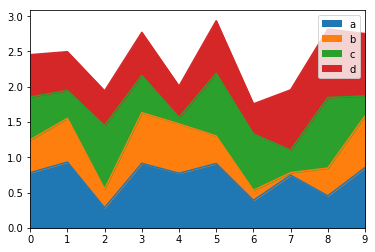

In [70]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
 
# plot
df.plot.area()


antagomir <leo.lahti@iki.fi>
Christian Panse <cp@fgcz.ethz.ch>
Thomas Dybdal Pedersen <thomasp85@gmail.com>
Nima Hejazi <nh@nimahejazi.org>
Zuguang Gu <jokergoo@gmail.com>
jokergoo <jokergoo@gmail.com>
guangchuang yu <guangchuangyu@gamil.com>
Shawn Balcome <balc0022@umn.edu>
Kevin Ushey <kevinushey@gmail.com>
dirmeier <simon.dirmeier@bsse.ethz.ch>


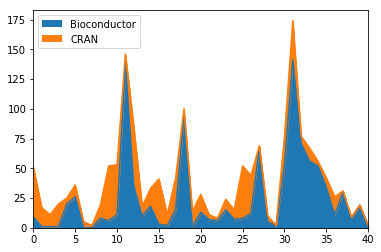

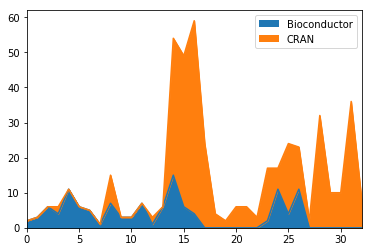

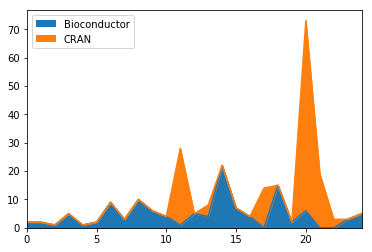

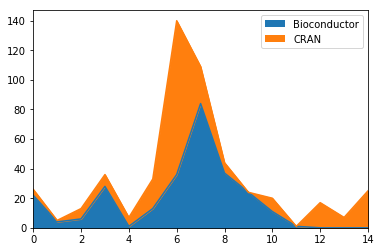

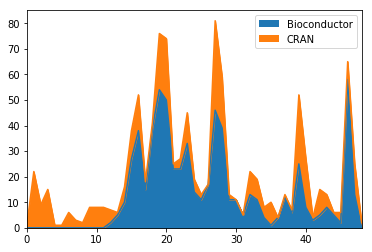

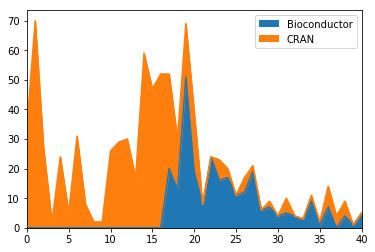

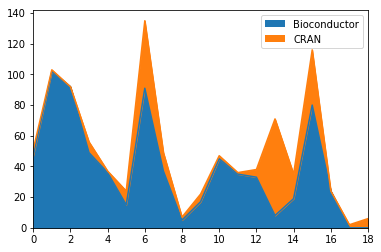

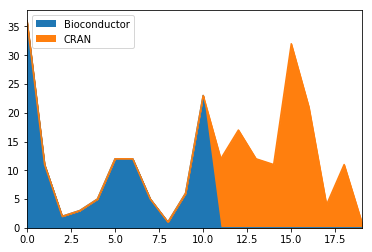

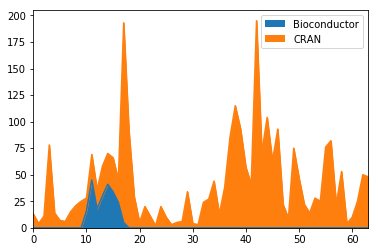

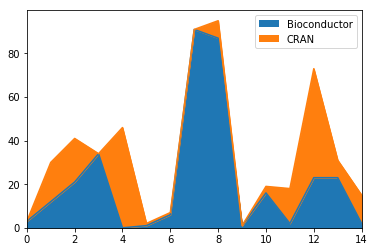

In [72]:
for person in focus:
    print person
    wif = focus[person]
    xform = [{"Bioconductor": wif[p]["Bioconductor"], "CRAN": wif[p]["CRAN"] } for p in sorted(wif)]
    df = pd.DataFrame.from_dict(xform)
    df.plot.area()